# Loksabha Analysis:



### Objective
To analyze and interpret the results of the General Lok Sabha elections using data analysis techniques, aiming to uncover voter behavior and electoral trends.

### General Lok Sabha Elections Dataset Description
- **ID**: Unique identifier for each record.
- **State**: The state in which the constituency is located.
- **Constituency**: The electoral constituency.
- **Candidate**: Name of the candidate contesting the election.
- **Party**: Political party affiliation of the candidate.
- **EVM Votes**: Votes cast through Electronic Voting Machines.
- **Postal Votes**: Votes cast through postal ballots.
- **Total Votes**: Total number of votes (EVM + Postal).
- **% of Votes**: Percentage of total votes received by the candidate.
- **Result**: Outcome of the election (e.g., elected, not elected).



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df=pd.read_csv("GE_2024_Results.csv")
#displaying first few rows
df.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [3]:
df.shape

(8902, 10)

In [4]:
df.columns

Index(['ID', 'State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


In [6]:
df.isnull().sum()

ID              0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
Result          0
dtype: int64

In [7]:
#converting data type to string
df['State'] = df['State'].astype(str)
df['Constituency'] = df['Constituency'].astype(str)
df['Candidate'] = df['Candidate'].astype(str)
df['Party'] = df['Party'].astype(str)

In [8]:
df[~df['EVM Votes'].str.isnumeric()]


,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
1737,1738,Gujarat,Surat,MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested ),Bharatiya Janata Party,-,-,0,-,Won


In [9]:
df[~df['Postal Votes'].str.isnumeric()]

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
11,12,Andaman & Nicobar Islands,Andaman & Nicobar Islands,ANAND RAMNATH ARLEKAR,Independent,342,-,342,0.17,Lost
143,144,Andhra Pradesh,Guntur,VISHNU REDDY LANKIREDDY,Bengaluru Nava Nirmana Party,461,-,461,0.03,Lost
150,151,Andhra Pradesh,Guntur,ASHOK ANAND GALI,Independent,335,-,335,0.02,Lost
156,157,Andhra Pradesh,Guntur,VANKAYALAPATI VENKATA SIVA RAMANJANEYULU,Independent,268,-,268,0.02,Lost
159,160,Andhra Pradesh,Guntur,SRIKRISHNA AKKISETTI,Independent,179,-,179,0.01,Lost
...,...,...,...,...,...,...,...,...,...,...
8769,8770,West Bengal,Maldaha Dakshin,JALALUDDIN SARKAR,Bharatiya Nyay-Adhikar Raksha Party,2075,-,2075,0.15,Lost
8781,8782,West Bengal,Maldaha Uttar,JOSEPH KISKU,Ambedkarite Party of India,4637,-,4637,0.33,Lost
8785,8786,West Bengal,Maldaha Uttar,SUBHASH BARMAN,Kamatapur People’s Party (United),2019,-,2019,0.14,Lost
8818,8819,West Bengal,Murshidabad,SAHABUDDIN MALLIK,Independent,4156,-,4156,0.27,Lost


In [10]:
df.isin(['-']).sum()

ID                0
State             0
Constituency      0
Candidate         0
Party             0
EVM Votes         1
Postal Votes    578
Total Votes       0
% of Votes        1
Result            0
dtype: int64

<Axes: >

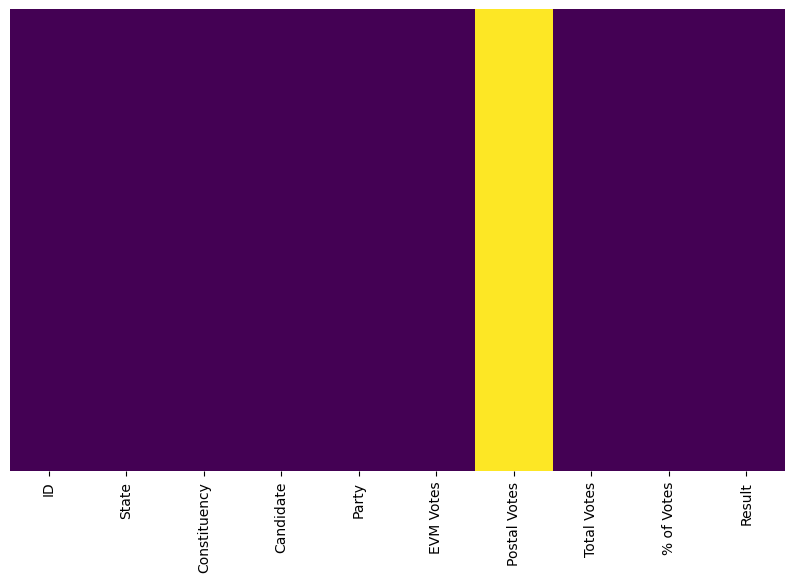

In [11]:
# Calculating the counts of '-' in each column
hyphen_counts = df.isin(['-']).sum()

# Reshaping the data for visualization using seaborn heatmap
hyphen_counts_reshaped = hyphen_counts.to_frame().T

import matplotlib
matplotlib.rcParams['figure.figsize']=(10,6)
sns.heatmap( hyphen_counts_reshaped ,yticklabels=False,cbar=False,cmap="viridis")

In [12]:
#repalcing hyphens with zeroes
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['EVM Votes'].fillna(0, inplace=True)

df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['Postal Votes'].fillna(0, inplace=True)

df['% of Votes'] = pd.to_numeric(df['% of Votes'], errors='coerce')
df['% of Votes'].fillna(0, inplace=True)

In [13]:
df.describe()

,ID,EVM Votes,Postal Votes,Total Votes,% of Votes
count,8902.000000,8.902000e+03,8902.000000,8.902000e+03,8902.000000
mean,4451.500000,7.207582e+04,420.636711,7.249646e+04,6.088488
std,2569.930382,1.788713e+05,1339.607914,1.798988e+05,14.630082
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2226.250000,1.085000e+03,3.000000,1.094250e+03,0.090000
50%,4451.500000,2.768500e+03,9.000000,2.781000e+03,0.240000
75%,6676.750000,9.677000e+03,49.000000,9.759500e+03,0.810000
max,8902.000000,1.468549e+06,19827.000000,1.471885e+06,78.540000


In [14]:
#categorical data analysis
categorical_data=['State', 'Constituency', 'Candidate', 'Party', 'Result']
df[categorical_data].describe()

,State,Constituency,Candidate,Party,Result
count,8902,8902,8902,8902,8902
unique,36,541,8101,746,2
top,Maharashtra,KARUR,NOTA,Independent,Lost
freq,1169,55,542,3920,8359


In [15]:
numeric_df=df[['EVM Votes','Postal Votes','Total Votes','% of Votes']]
# Calculate correlation matrix
corr_matrix=numeric_df.corr()
corr_matrix

,EVM Votes,Postal Votes,Total Votes,% of Votes
EVM Votes,1.000000,0.765486,0.999989,0.976355
Postal Votes,0.765486,1.000000,0.768560,0.765931
Total Votes,0.999989,0.768560,1.000000,0.976482
% of Votes,0.976355,0.765931,0.976482,1.000000


 From the above matrix it is clear that "EVM Votes" and "Total Votes" are mostly correlated with correlation coefficient of 0.999989 (strong positive correlation) 

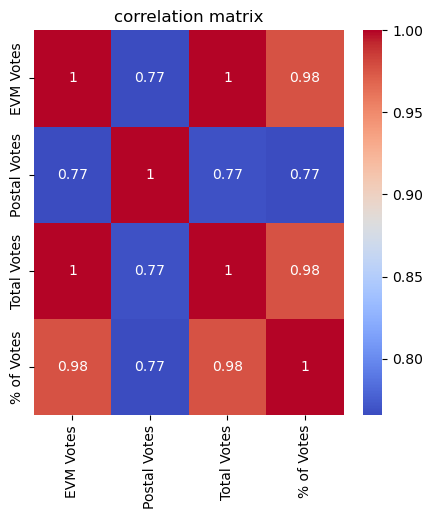

In [16]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

1. The most of the data points of evm votes are concentrated between 0.0 to 0.2 million resulting in lower evm counts
2. After 0.2 million votes the frequency rapidly declines with few constituencies having high number of votes
3. The shape of the curve indicates that the EVM votes are rightly skewed, meaning most constituencies had lower vote count and 
    few with high vote count possibly due to their larger population

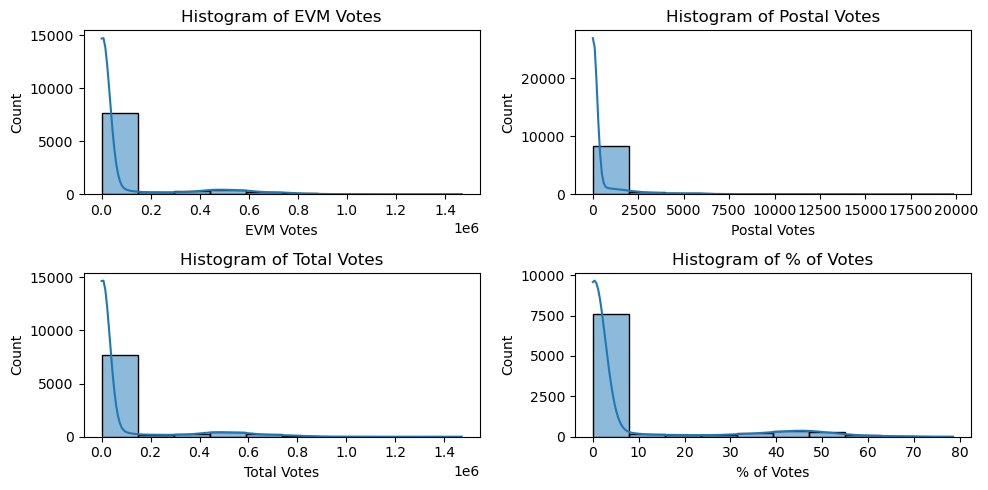

In [17]:

# Create subplots for each histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plotting histogram for 'col1'
sns.histplot(data=df, x='EVM Votes', bins=10,kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of EVM Votes')

# Plotting histogram for 'col2'
sns.histplot(data=df, x='Postal Votes', bins=10,kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Postal Votes')

# Plotting histogram for 'col3'
sns.histplot(data=df, x='Total Votes', bins=10,kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Total Votes')

# Plotting histogram for 'col4'
sns.histplot(data=df, x='% of Votes', bins=10,kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of % of Votes')

plt.tight_layout()  # To prevent overlap of subplots
plt.show()


* The data is right-skewed (positive skewness).
* The majority of the votes are at lower values with some regions having exceptionally high votes, creating a long right tail in the distribution.

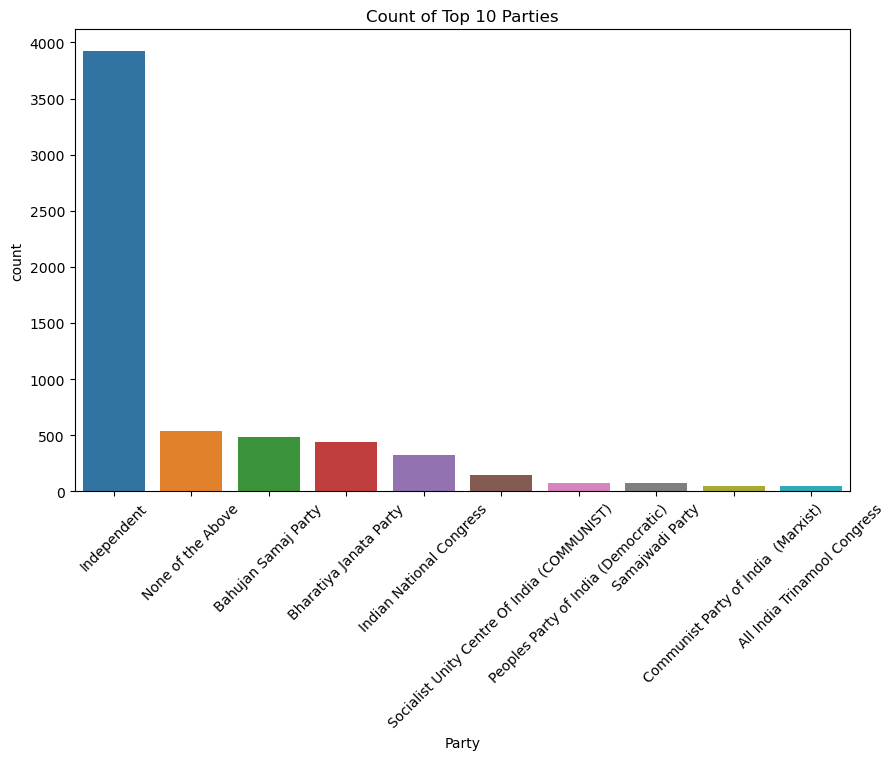

In [18]:
# Bar plot
top_10_parties = df['Party'].value_counts().nlargest(10)
df_top_10 = df[df['Party'].isin(top_10_parties.index)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10, x='Party', order=top_10_parties.index)
plt.xticks(rotation=45)
plt.title('Count of Top 10 Parties')
plt.show()


* Most candidates in this data set are independent , they are not part of any political parties.
* The next largest group is None of the above (NOTA) showing that many voters chose to reject all candidates in some elections.
* Major political parties like Bsp,Bjp,Congress have fewer candidates in comparision with independent parties but they still playes major role

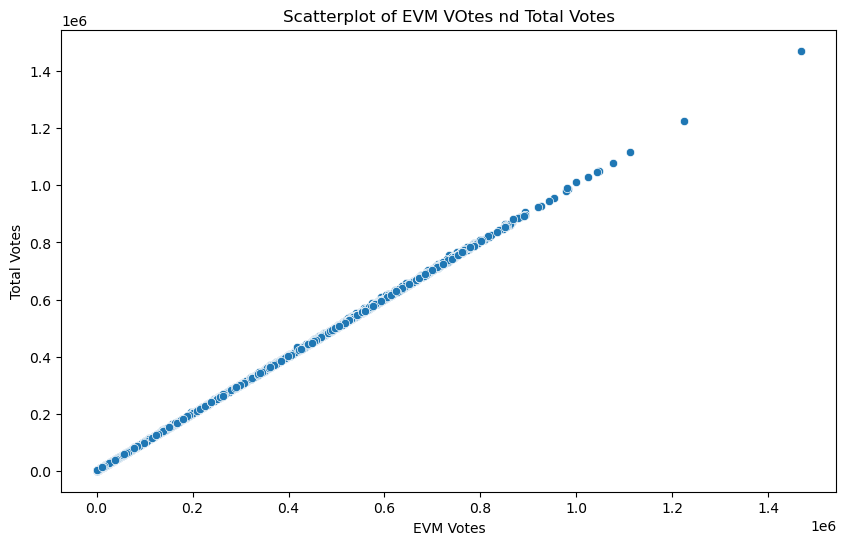

In [19]:
# EVM votes vs Total Votes
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='EVM Votes',y='Total Votes')
plt.title('Scatterplot of EVM VOtes nd Total Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Total Votes')
plt.show()

* The scatter plot shows a very srong positive relationship between EVM Votes ans Total Votes
* Thepoints make up a nearly perfect diagonal line ,meaning that EVM VOtes make up a large portion of the Total Votes
  
  
In simple terms, as people vote more through EVM,the total number of votes increases proportionally

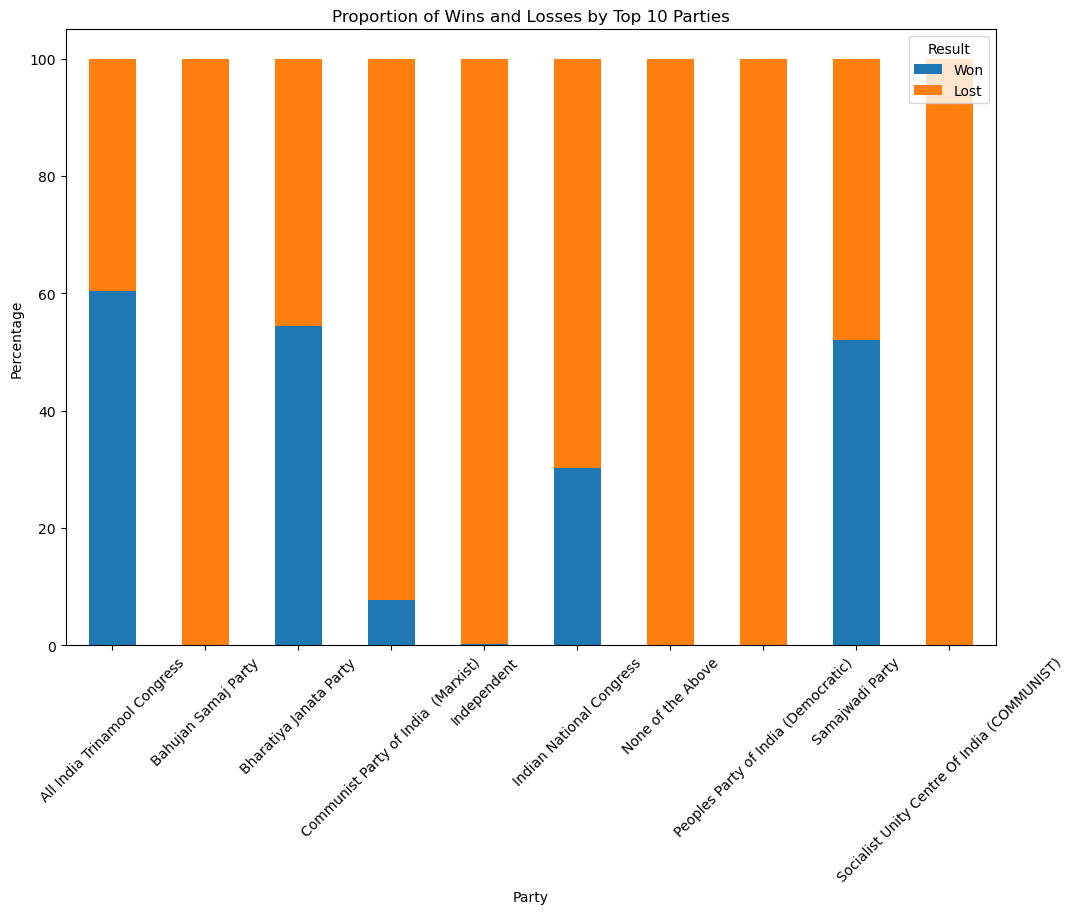

In [20]:
# Select the top N parties based on their total counts
top_10_parties = df['Party'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top N parties
df_top_n_parties = df[df['Party'].isin(top_10_parties)]

# Create a DataFrame to count the number of wins and losses for the top N parties
party_results = df_top_n_parties.groupby(['Party', 'Result']).size().unstack().fillna(0)
party_results['Total'] = party_results['Won'] + party_results['Lost']
party_results['Won %'] = party_results['Won'] / party_results['Total'] * 100
party_results['Lost %'] = party_results['Lost'] / party_results['Total'] * 100

# Stacked bar chart for proportion of wins and losses by the top N parties
ax = party_results[['Won %', 'Lost %']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Wins and Losses by Top 10 Parties')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set the legend labels for 'Won' and 'Lost'
ax.legend(['Won', 'Lost'], title='Result')
plt.show()


**The bar chart shows the percentage of wins and losses for the top 10 parties:**

- **All India Trinamool Congress** has the highest win ratio, with about 60% of its candidates winning.
- **Bharatiya Janata Party** and **Samajwadi Party** show a balance between wins and losses.
- **Communist Party of India (Marxist)** and **Indian National Congress** show a majority of losses, with only a few candidates winning.
- The remaining parties, including **Bahujan Samaj Party**, **Independent**, and others, had **all** their candidates losing.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


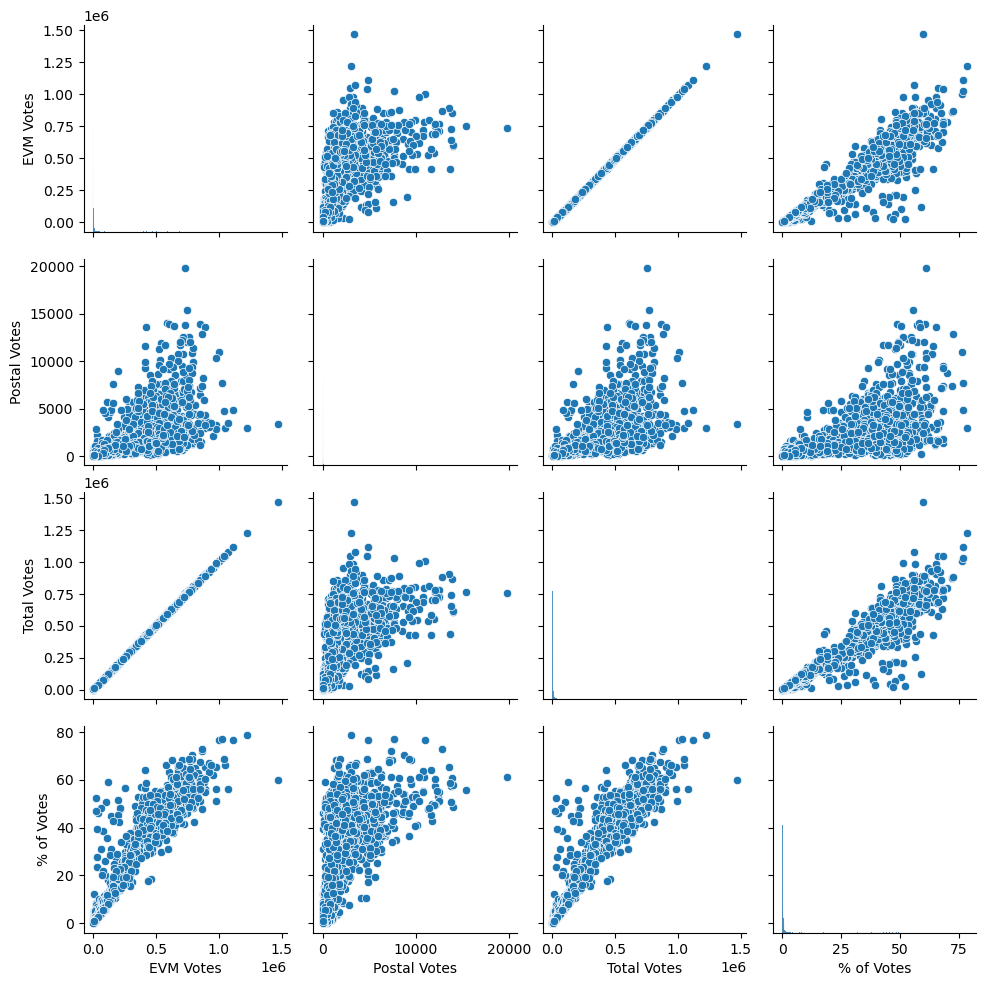

In [21]:
# Select only numerical columns 
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

if 'ID' in numerical_columns:
    numerical_columns=numerical_columns.drop(columns=['ID'])

# Create pair plots for all numerical variables
sns.pairplot(numerical_columns)
plt.show()


 - Which state/constituency had the highest number of total votes?



In [22]:
df.loc[df['Total Votes'].idxmax()][['State','Constituency']]

State            Assam
Constituency    Dhubri
Name: 535, dtype: object

- which state or constituency had the lowest number of votes? 

In [23]:
df.loc[df['Total Votes'].idxmin()][['State','Constituency']]

State           Gujarat
Constituency      Surat
Name: 1737, dtype: object

- What is the distribution of EVM votes across states?


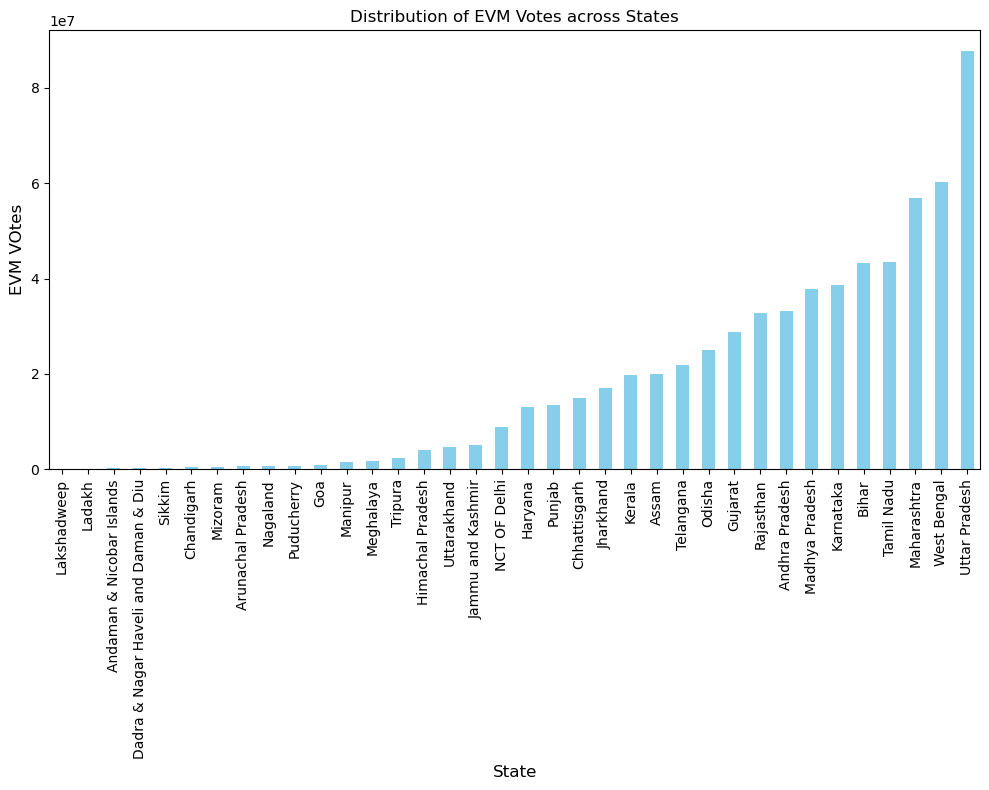

In [25]:

state_votes_stats = df.groupby('State')['EVM Votes'].sum()
plt.figure(figsize=(10,8))
state_votes_stats.sort_values(ascending=True).plot(kind='bar',color='skyblue')
plt.title('Distribution of EVM Votes across States')
plt.xlabel('State',fontsize=12)
plt.ylabel('EVM VOtes',fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.show()

- Uttar Pradesh has the highest number of EVM Votes indicating it has large number of voters
- Smaller regions like Lakshadweep, Ladakh, and Andaman & Nicobar Islands have very few votes, which indicates their smaller population
* The distribution is uneven, with a small number of large states contributing the majority of votes, while many smaller states contribute far fewer votes.

--------------------------------------------------------------

- Which candidates won or lost the election, and how does that relate to the percentage of votes they received?

In [26]:
print(df[['Candidate', 'Result', '% of Votes']])


               Candidate Result  % of Votes
0        BISHNU PADA RAY    Won       50.58
1     KULDEEP RAI SHARMA   Lost       38.54
2             MANOJ PAUL   Lost        4.08
3             D AYYAPPAN   Lost        2.97
4        V.K. ABDUL AZIZ   Lost        1.09
...                  ...    ...         ...
8897     SK. SAPIYAR ALI   Lost        0.21
8898         NIKHIL BERA   Lost        0.15
8899   AMAL KUMAR BARMAN   Lost        0.14
8900    RAMPRASAD GHORAI   Lost        0.11
8901                NOTA   Lost        0.81

[8902 rows x 3 columns]


Winners tend to have higher percentages of votes, while losers have lower percentages.
In general winners tend to have more than half percentage of the total votes.

 - Do certain parties rely more on postal votes than others?


In [30]:

# Calculate the percentage of postal votes
df['%PostalVotes'] = (df['Postal Votes'] / df['Total Votes']) * 100

# Group by party and calculate the average percentage of postal votes
party_postal_votes = df.groupby('Party')['%PostalVotes'].mean()

# Sort parties by average postal votes (highest to lowest)
sorted_party_postal_votes = party_postal_votes.sort_values(ascending=False)

# Print the results
print(sorted_party_postal_votes)


Party
Rashtriya Congress(J) Party           8.175182
Citizen Action Party-Sikkim           5.863629
Anaithu India Makkal Katchi           4.909285
National Awami United Party           4.619126
Sikkim Krantikari Morcha              4.598652
                                        ...   
Rashtriya Janmorcha                   0.000000
Kannada  Paksha                       0.000000
Akhil Bhartiya Sudhar Party           0.000000
All India Mahila Empowerment Party    0.000000
Spashtwadi Jan Aadhar Party           0.000000
Name: %PostalVotes, Length: 746, dtype: float64


Rashtriya Congress(J) Party is the party that relies most on the postal votes than other parties and then followed by Citizen Action Party-Sikkim.

# Conclusion:

**In this data analysis project, we explored Lok Sabha election data and uncovered several interesting findings:**

- EVM Votes and Total Votes Correlation:
EVM Votes and Total Votes exhibit a strong positive correlation (correlation coefficient ≈ 0.999989).
Most EVM votes cluster between 0.0 and 0.2 million, indicating lower EVM counts.
Beyond 0.2 million votes, the frequency rapidly declines, with a few constituencies having high vote counts.
- Distribution of EVM Votes:
The distribution of EVM votes is right-skewed, with a long right tail.
Smaller regions have fewer votes, while larger states contribute significantly.
- Party Insights:
Independent candidates dominate the dataset, followed by “None of the above” (NOTA).
Major political parties (BSP, BJP, Congress) have fewer candidates but still play a significant role.
- Win-Loss Ratios:
All India Trinamool Congress has the highest win ratio (about 60%).
CPI(M) and INC show more losses than wins.
- Postal Votes Reliance:
The Rashtriya Congress(J) Party relies most on postal votes, followed by Citizen Action Party-Sikkim.

Overall, this analysis provides valuable insights into voting patterns and party dynamics during elections.

